# Supply Genererator Module

The Supply Generator module of the Robin simulator provides a randomized list of services and supply YAML file based on two configuration input files. The generated supply file can be used as an input for the Robin Kernel module. This notebook is intended to show the functionality of the `SupplyGenerator` class.

## 0. Import Libraries and define file paths

In [1]:
%load_ext autoreload
%autoreload 2

import datetime

from robin.plotter.entities import KernelPlotter
from robin.supply.generator.entities import SupplyGenerator
from robin.supply.entities import Supply

In [2]:
supply_config_path = '../configs/supply_generator/supply_data.yaml'
generator_config_path = '../configs/supply_generator/config.yaml'
generator_save_path = '../data/generator/supply_dummy.yaml'

## 1. Generate services

The next cell initializes an instance of the `SupplyGenerator` class. Two configuration files must be provided.
- Supply configuration is used as a reference for operational times, TSPs, lines, etc.
- Generator configuration file has different parameters such as the range of dates, prices configuration, departure time probability distribution, etc.

In [3]:
generator = SupplyGenerator.from_yaml(
    path_config_supply=supply_config_path,
    path_config_generator=generator_config_path
)

By calling the `generate()` method of the `SupplyGenerator`, a list of services is obtained based on the provided configuration files, and a supply YAML file is saved. It's also possible to specify the number of services to generate for each TSP with the parameter `n_services_by_tsp`. The services are generated without conflicts by default.

In [4]:
seed = 42
generator.generate(
    n_services=80,
    #n_services_by_tsp={'1': 25, '2': 5},
    output_path=generator_save_path,
    seed=seed,
    progress_bar=True,
    without_conflicts=True
)

print(f'Number of service requests generated: {len(generator.services)}')

Generating services all:   0%|          | 0/80 [00:00<?, ?service/s]

Generating services all:  88%|████████▊ | 70/80 [00:03<00:00, 20.93service/s] 

2025-05-25 17:53:38.283 | WARNING  | robin.supply.generator.entities:_generate_service:572 - Max retries reached. A feasible service could not be generated.
2025-05-25 17:53:38.284 | WARNING  | robin.supply.generator.entities:generate:760 - Unfeasible service generated. Stopping generation with 70 generated services.
Number of service requests generated: 70


The next cell checks if the generated supply file can be successfully loaded by the Robin Supply module.

In [5]:
supply = Supply.from_yaml(generator_save_path)
print(f'Number of service requests generated: {len(supply.services)}')

Number of service requests generated: 70


## 3. Marey chart from the Plotter module

This cell initializes a `KernelPlotter` object using the generated supply file.

In [6]:
kernel_plotter = KernelPlotter(
    path_config_supply=generator_save_path
)

The Marey chart provides a visual representation of the different services matching de provided date. The method provides a plot for all the branches visited by the provided services.

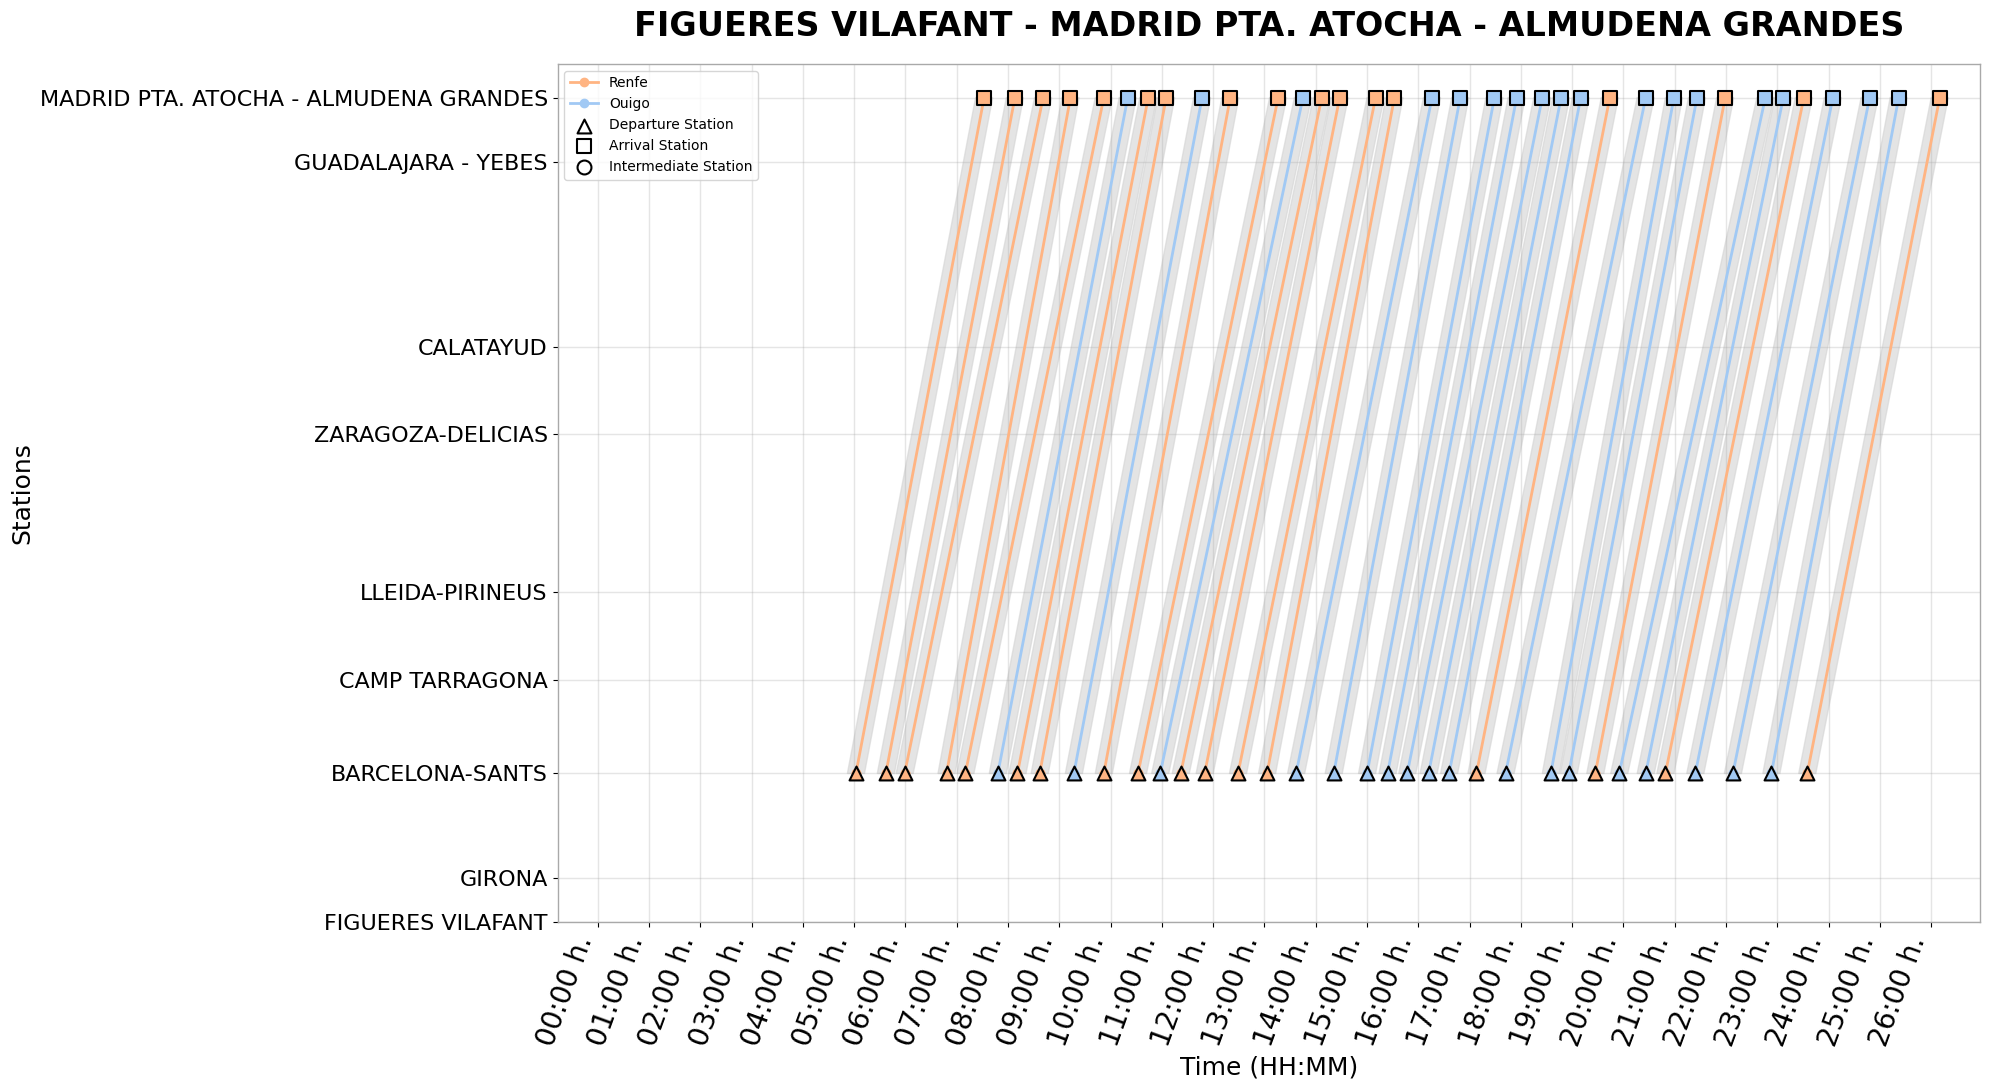

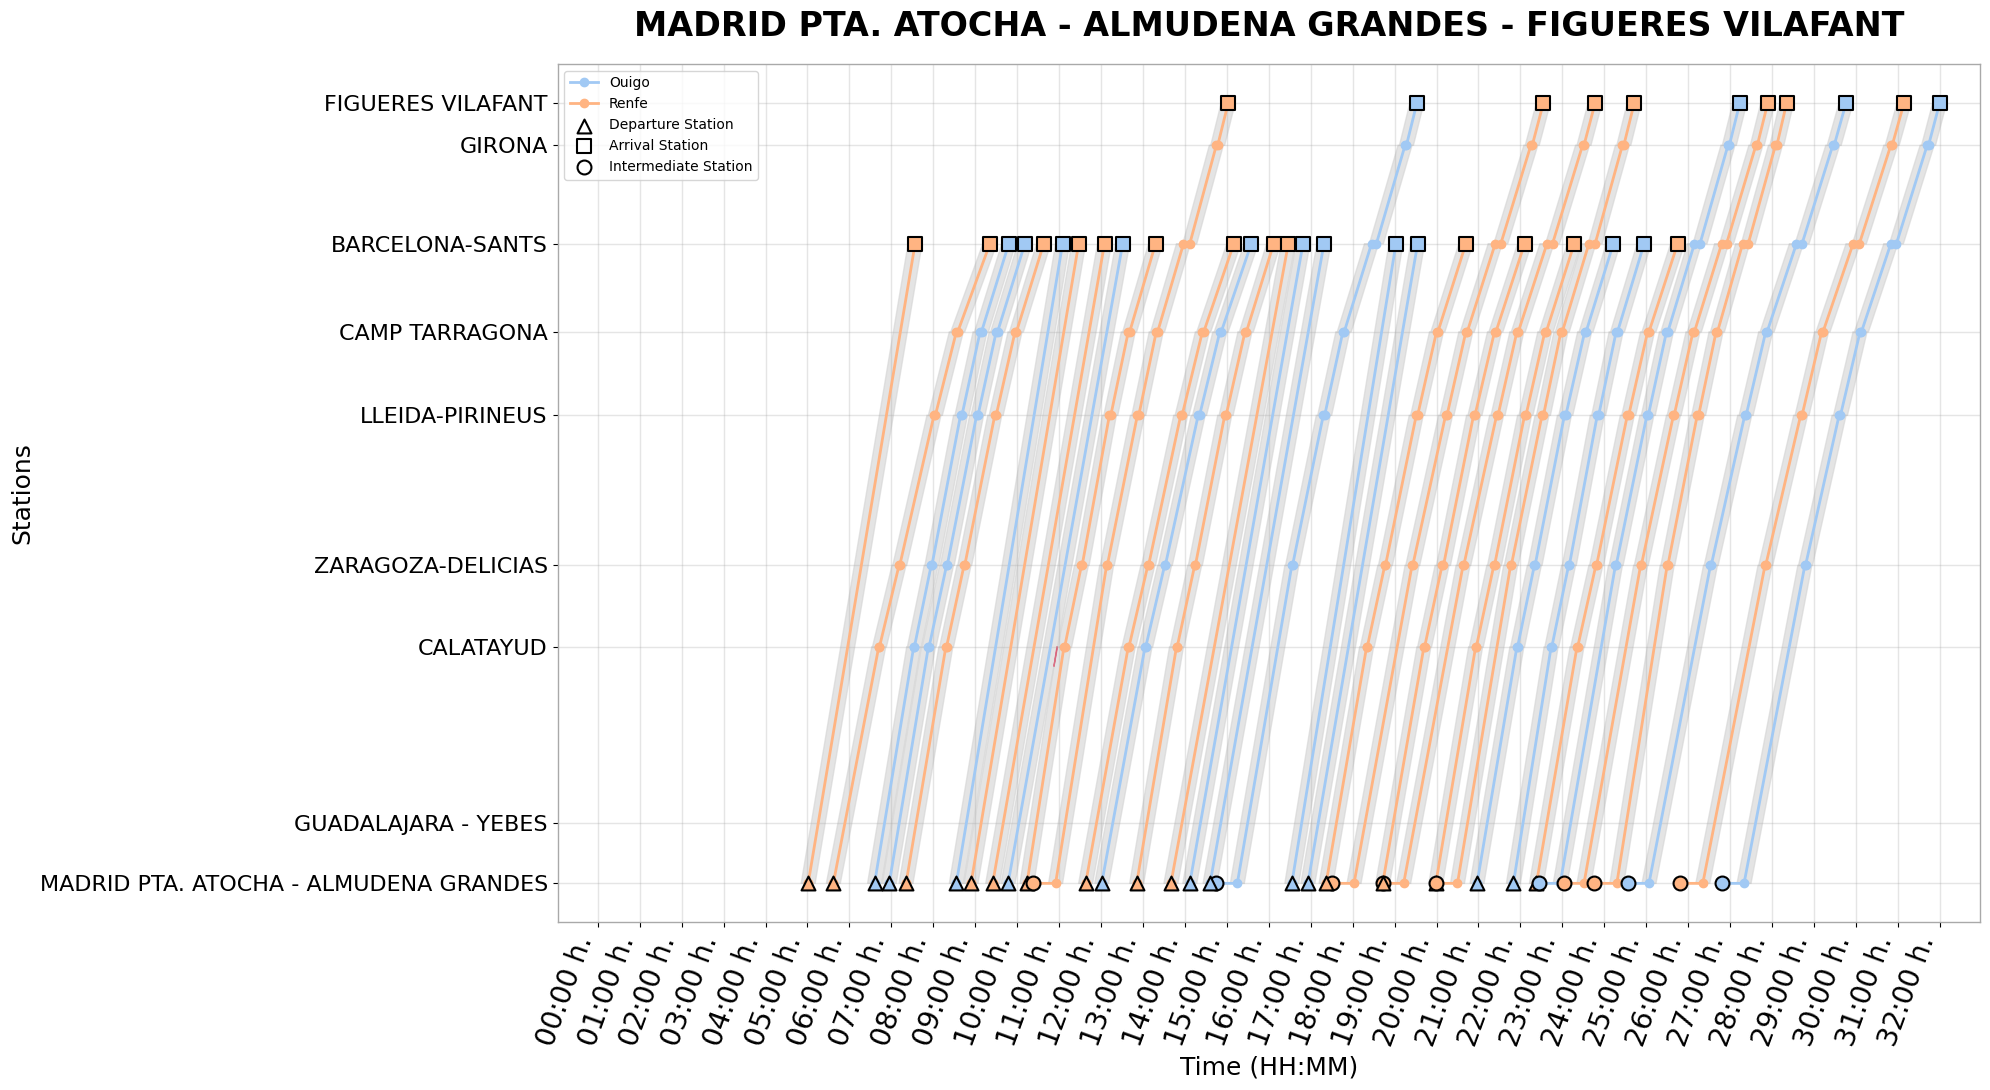

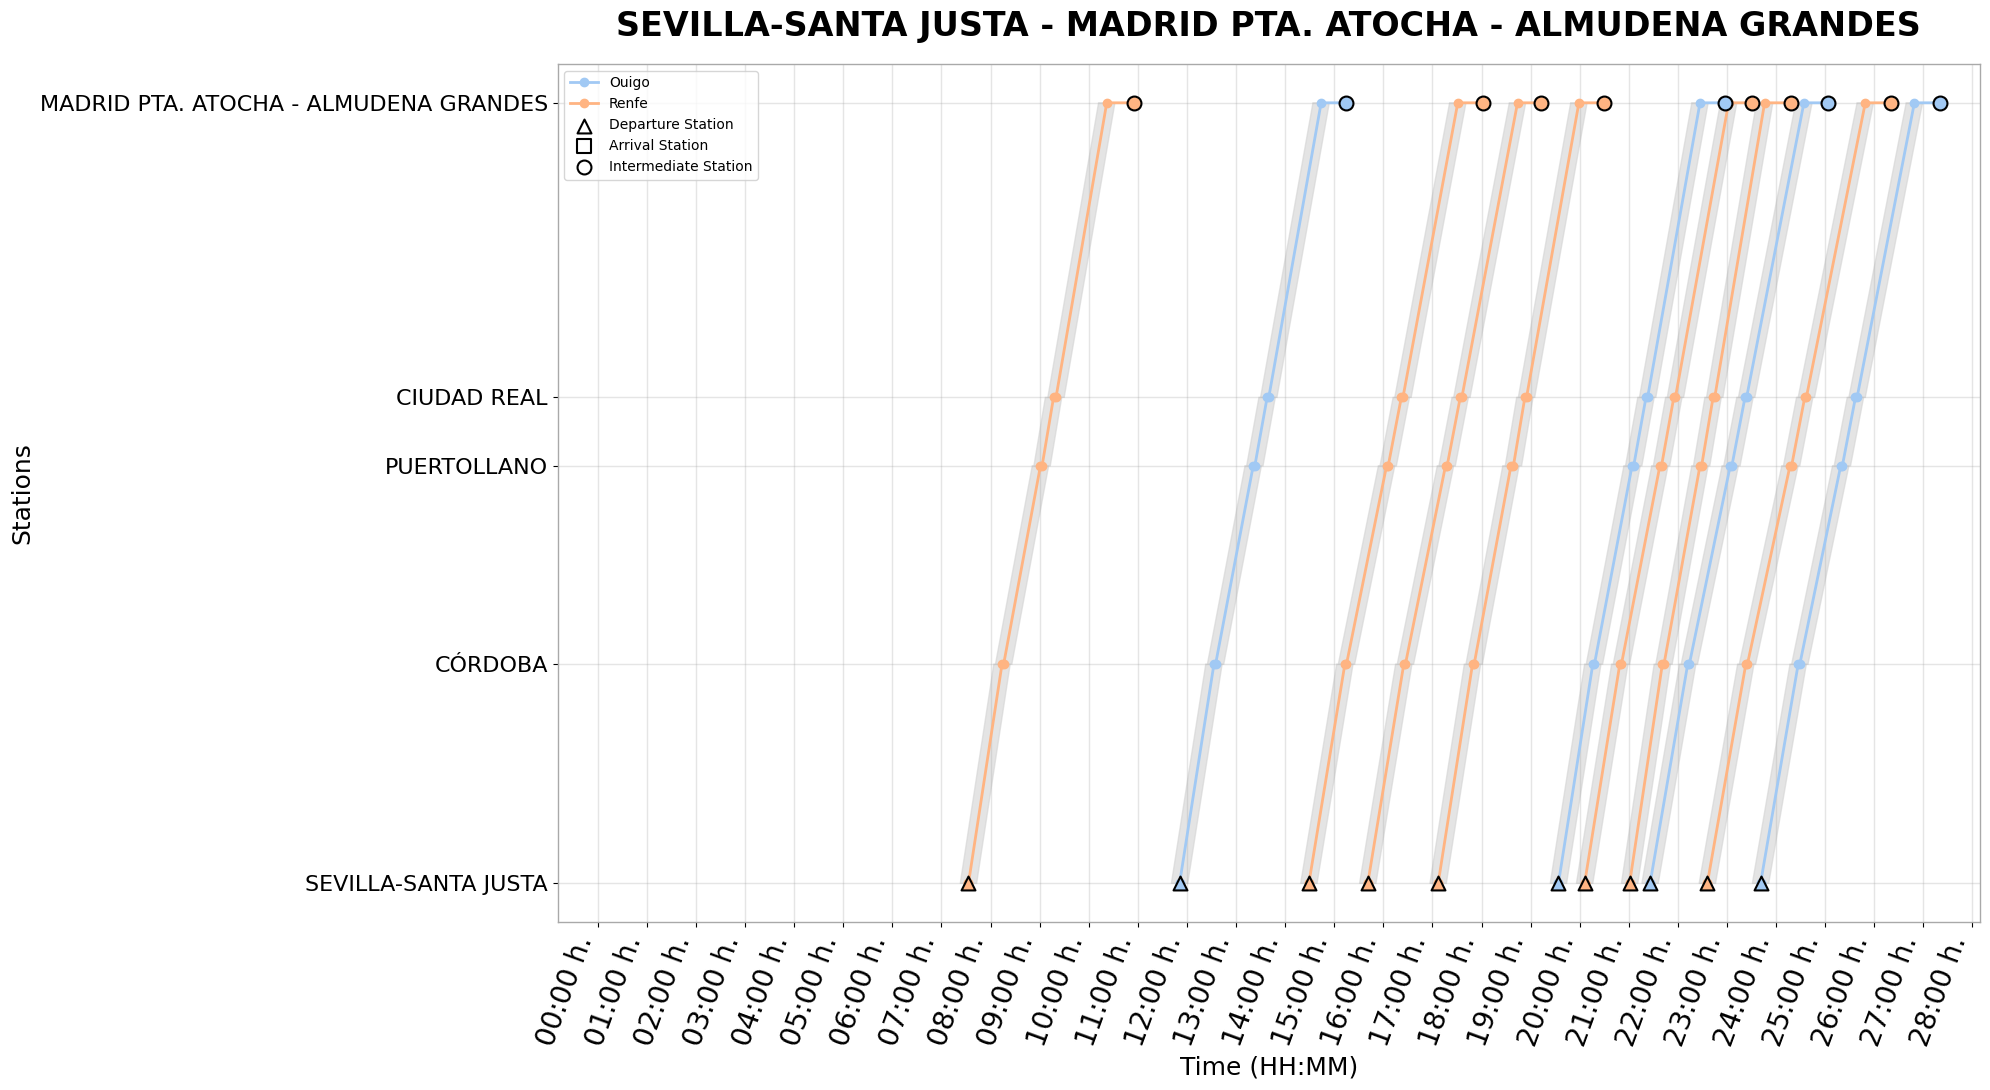

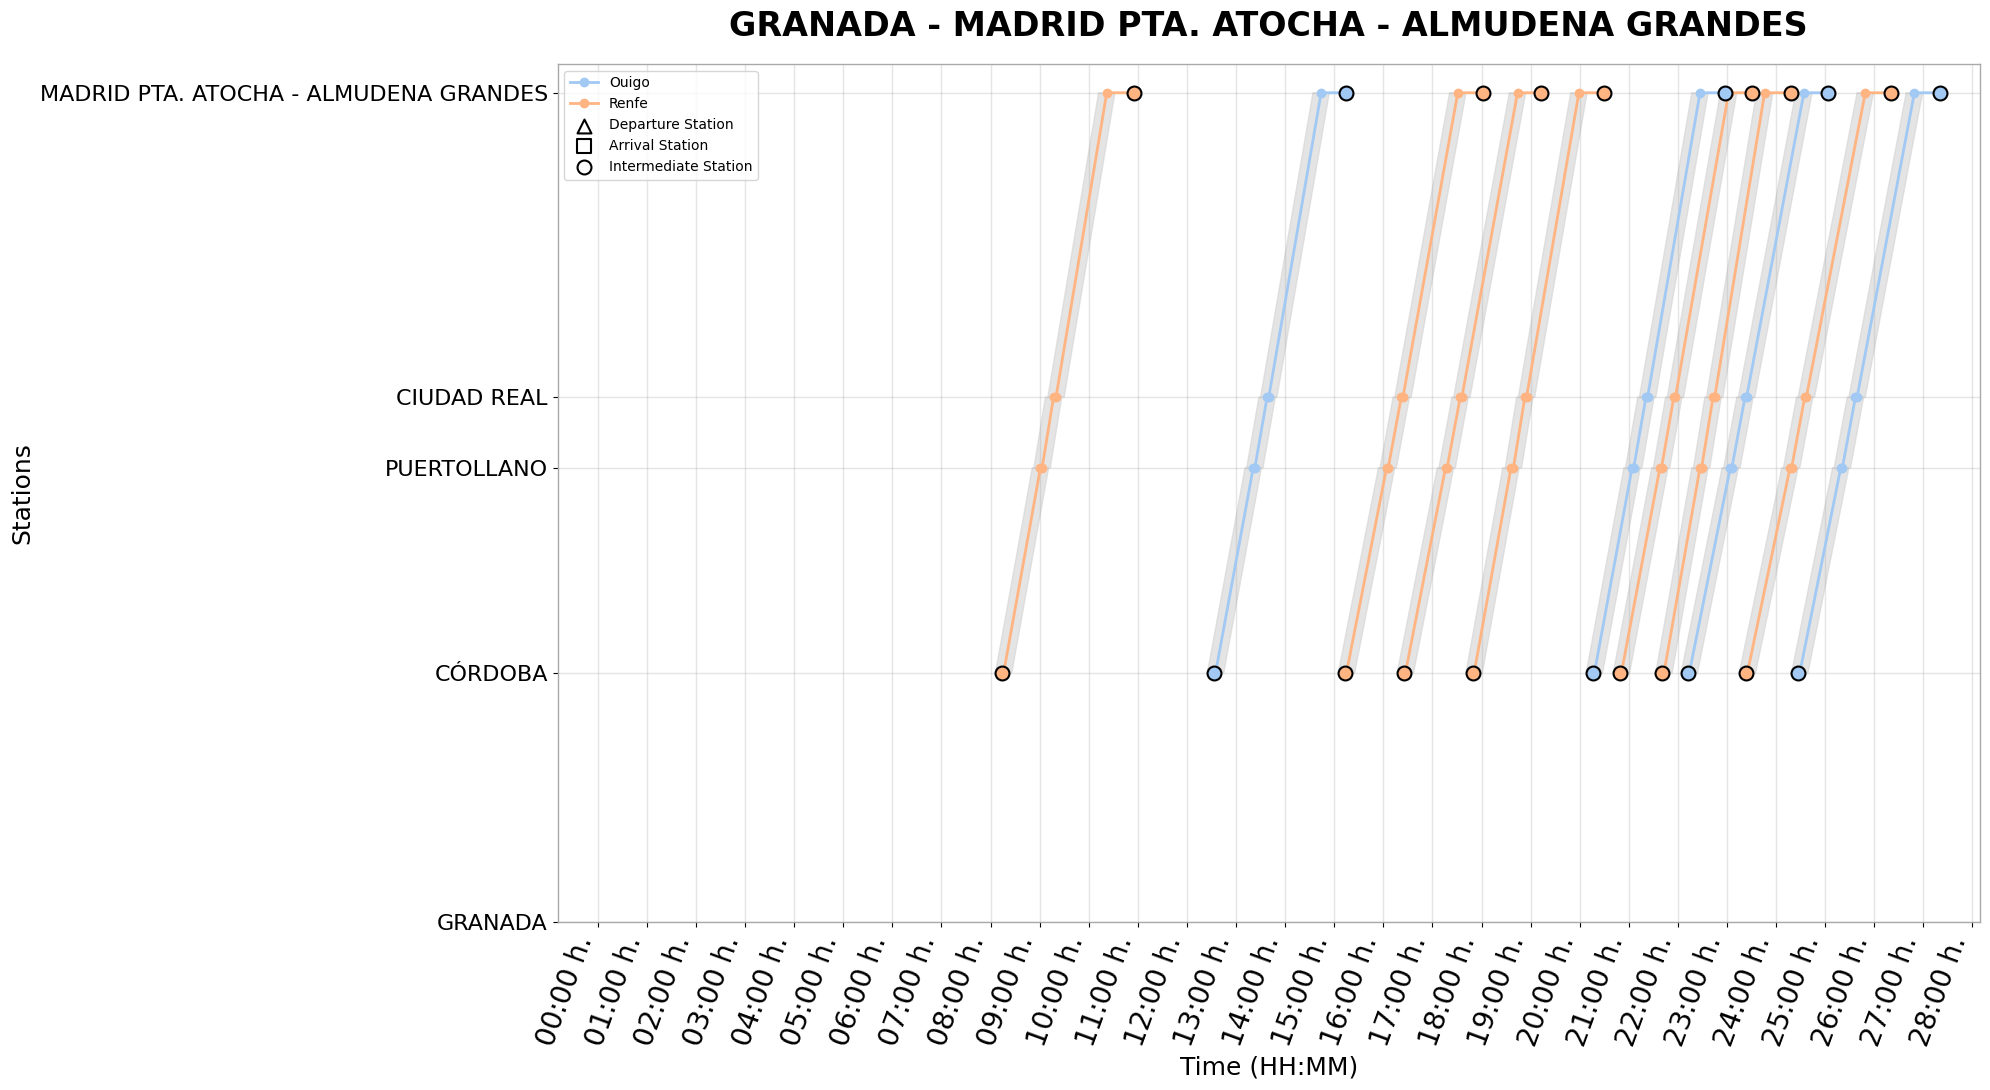

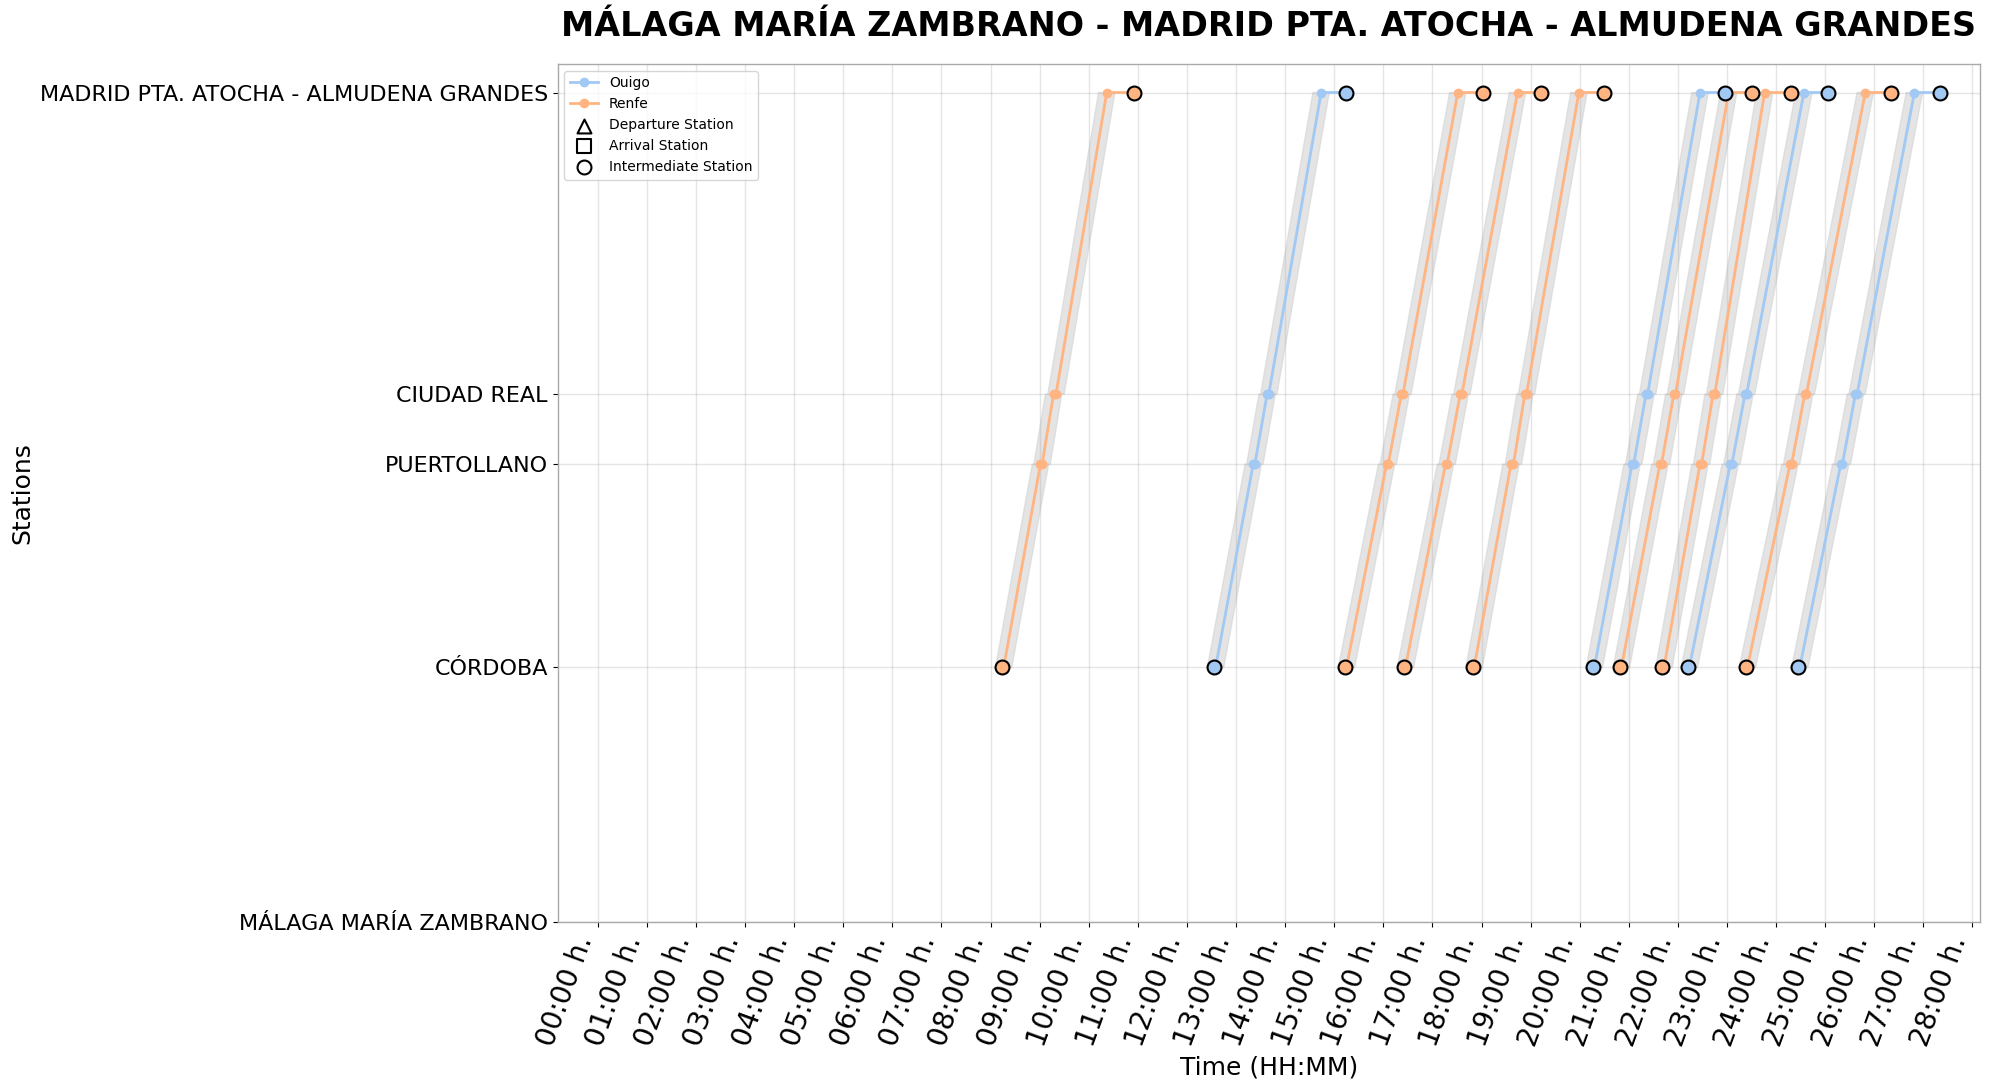

In [7]:
date = datetime.datetime.strptime('2024-06-25', '%Y-%m-%d').date()
kernel_plotter.plot_marey_chart(
    date=date,
    save_path='../reports/figures/'
)